# **DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION** #GRIPJAN21
### Author: SHIVAM SHARMA


##  TASK 6: Prediction using Decision Tree Algorithm

### Create the Decision Tree classifier and visualize it graphically.

In [1]:
# Importing the required library
import pandas as pd                           #Pandas library : used for reading and manipulating large dataset
import matplotlib.pyplot as plt               #Matplotlib library : used for ploting graphs.
import seaborn as sb                          #Seaborn for Graphical representation
%matplotlib inline

# Fetching data 

In [2]:
df = pd.read_csv("Iris.csv")
# peek a bow at the data
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis = 1,inplace =True)                      # Removing extra column from the data

# Graphical representation

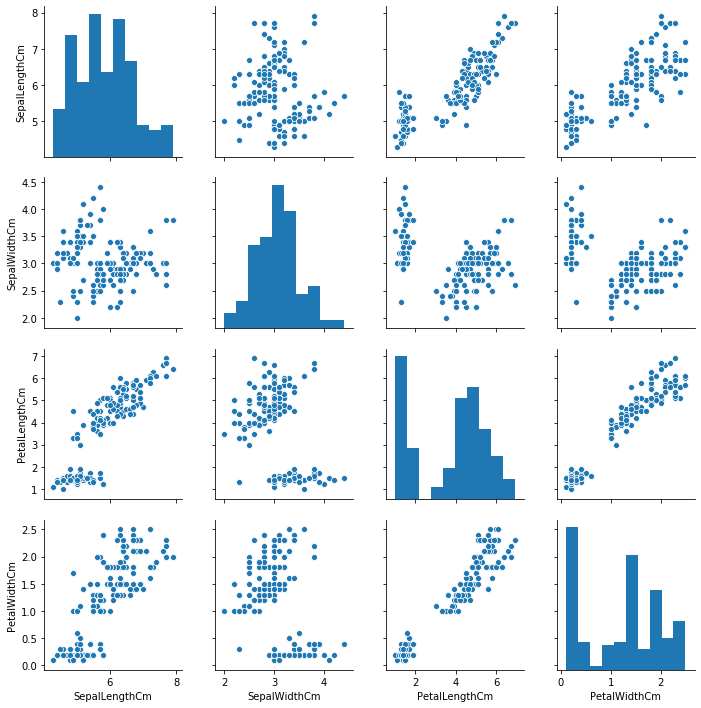

In [4]:
sb.pairplot(df)                                         

# Converting the categorical data into numerical data

In [5]:
df.Species = df['Species'].map({'Iris-setosa':0,"Iris-virginica":2,"Iris-versicolor":1})

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Seperating feature matrix (x) and Vector (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
# splitting into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10) 

### Training the DecisionTree Algorithm

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
# Accuracy of training set
dt.score(X_train,y_train)

1.0

#### Decision Tree has the tendency to memorise the training data which leads to overfitting

In [11]:
# making predictions
y_pred = dt.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2], dtype=int64)

In [12]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0


In [13]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


0.9736842105263158

In [14]:
# conda install python-graphviz                               # Install python-graphviz to use its functionality

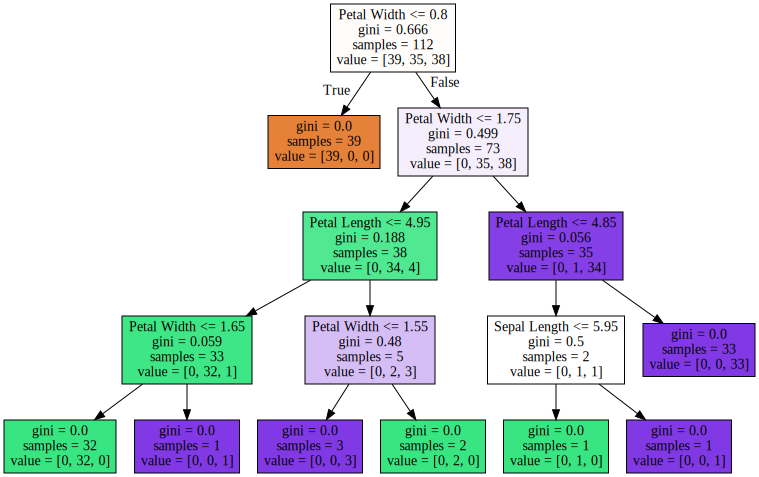

In [15]:
import graphviz 
from sklearn import tree
f = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
d = tree.export_graphviz(dt, feature_names = f, filled=True)
dtree = graphviz.Source(d, format="png") 
dtree

## Thank you !!